<a href="https://colab.research.google.com/github/Rathi458/skills-introduction-to-github/blob/main/TenYearCDH%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data_cardiovascular_risk.csv')

In [3]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


Handling Null values

In [5]:
df.isna().sum()

,0
id,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0


there are

87 records in which education is not mentioned

22 records in which cigs perday is not mentioned

44 records BP records

38 totchol

14 BMI

1 heart Rate

304 glucose



In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 1 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2927 non-null   int64  
 1   age              2927 non-null   int64  
 2   education        2927 non-null   float64
 3   sex              2927 non-null   object 
 4   is_smoking       2927 non-null   object 
 5   cigsPerDay       2927 non-null   float64
 6   BPMeds           2927 non-null   float64
 7   prevalentStroke  2927 non-null   int64  
 8   prevalentHyp     2927 non-null   int64  
 9   diabetes         2927 non-null   int64  
 10  totChol          2927 non-null   float64
 11  sysBP            2927 non-null   float64
 12  diaBP            2927 non-null   float64
 13  BMI              2927 non-null   float64
 14  heartRate        2927 non-null   float64
 15  glucose          2927 non-null   float64
 16  TenYearCHD       2927 non-null   int64  
dtypes: float64(9), int6

After droping the null records

# **check for duplicate**

In [8]:
df.duplicated().sum()

np.int64(0)

there is no duplicate record

No.of records of having a ten year chd and not having one

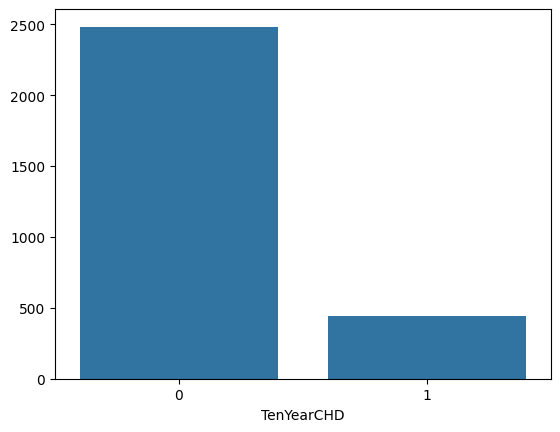

In [9]:
sns.barplot(x=df['TenYearCHD'].value_counts().index,y=df['TenYearCHD'].value_counts().values)
plt.show()

we can see clearly that most of the data is in favor of 0 which can make classification biased we need to add dummy data from original in favor of 1 so model is not biased


In [10]:
from sklearn.utils import resample
majority=df[df['TenYearCHD']==0]
minority=df[df['TenYearCHD']==1]
minority_unsamped=resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)
df=pd.concat([majority,minority_unsamped])
df.TenYearCHD.value_counts()

,count
TenYearCHD,
0,2483
1,2483


now data is balanced

In [11]:
#convert categorical column to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])

In [12]:
le=LabelEncoder()
df['education']=le.fit_transform(df['education'])

In [13]:
le=LabelEncoder()
df['is_smoking']=le.fit_transform(df['is_smoking'])

In [14]:
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,1,36,3,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
4,4,64,0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
6,6,61,0,1,0,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,3,1,1,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2343,67,0,0,0,0.0,1.0,0,1,0,228.0,144.0,85.0,27.59,65.0,75.0,1
2559,2559,40,0,1,0,0.0,0.0,0,1,0,175.0,173.0,59.0,27.99,70.0,75.0,1
3328,3328,62,0,1,0,0.0,0.0,0,0,0,252.0,156.5,93.0,28.65,88.0,97.0,1
1865,1865,65,3,1,1,6.0,0.0,0,0,0,236.0,118.5,77.5,24.30,52.0,65.0,1


In [15]:
#features extraction
x=df.drop(['TenYearCHD','id'],axis=1)
y=df['TenYearCHD']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred=lr.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6468812877263581
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       502
           1       0.63      0.68      0.65       492

    accuracy                           0.65       994
   macro avg       0.65      0.65      0.65       994
weighted avg       0.65      0.65      0.65       994



Logistic regression has 64% accuracy hence not an ideal model for classification regression

<Axes: >

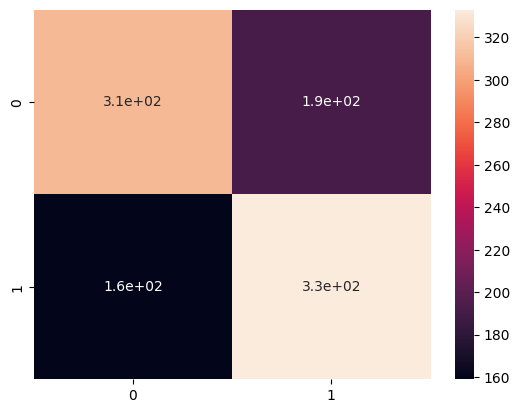

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini")
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9114688128772636
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       502
           1       0.85      0.99      0.92       492

    accuracy                           0.91       994
   macro avg       0.92      0.91      0.91       994
weighted avg       0.92      0.91      0.91       994



Accuracy has improved a lot i.e,91.14%

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion="gini")
rf.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9698189134808853
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       502
           1       0.95      0.99      0.97       492

    accuracy                           0.97       994
   macro avg       0.97      0.97      0.97       994
weighted avg       0.97      0.97      0.97       994



<Axes: >

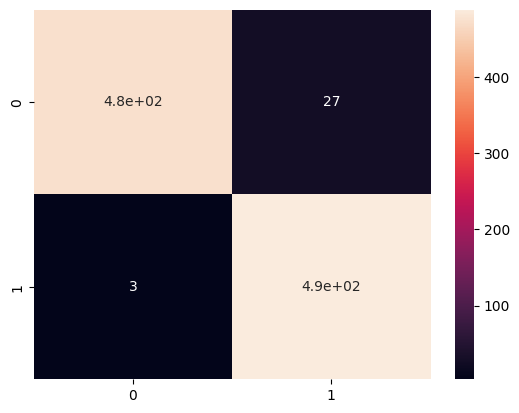

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

Accuracy has improved a lot i.e 96.98%

# SVM

Linear

In [37]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [38]:
y_pred=svm.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6529175050301811
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       502
           1       0.65      0.66      0.65       492

    accuracy                           0.65       994
   macro avg       0.65      0.65      0.65       994
weighted avg       0.65      0.65      0.65       994



Svm with linear kernel is not much successfull in classification

Rbf

In [39]:
svm1=SVC(kernel='rbf')
svm1.fit(x_train,y_train)

SVC()

In [40]:
y_pred=svm1.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6378269617706237
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       502
           1       0.63      0.64      0.64       492

    accuracy                           0.64       994
   macro avg       0.64      0.64      0.64       994
weighted avg       0.64      0.64      0.64       994



Not much improvement

poly

In [41]:
svm2=SVC(kernel='poly')
svm2.fit(x_train,y_train)

SVC(kernel='poly')

In [42]:
y_pred=svm2.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6599597585513078
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       502
           1       0.67      0.63      0.65       492

    accuracy                           0.66       994
   macro avg       0.66      0.66      0.66       994
weighted avg       0.66      0.66      0.66       994



svm proven to be less suitable for classification

Conclusion
*Random Forest Classifier is more successfull in classification of Ten Year CHD with an accuracy of more than 95 percentage.